<a href="https://colab.research.google.com/github/AbigailMRod/CV_edX/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Library

Las tareas de procesamiento de imágenes y visión por computadora incluyen visualización, recorte, volteo, rotación, segmentación de imágenes, clasificación, restauración de imágenes, reconocimiento de imágenes, generación de imágenes. Además, trabajar con imágenes a través de la nube requiere almacenar, transmitir y recopilar imágenes a través de Internet.
Python es una excelente opción ya que tiene muchas herramientas de procesamiento de imágenes, visión artificial y bibliotecas de inteligencia artificial. Finalmente, tiene muchas bibliotecas para trabajar con archivos en la nube e Internet.
Una imagen digital es simplemente un archivo en su computadora

---




### Clonamos el repositorio para obtener los archivs

In [9]:
!git clone https://github.com/AbigailMRod/CV_edX.git

Cloning into 'CV_edX'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


### Damos acceso al Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [4]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Imágenes y rutas


In [10]:
my_image="/content/CV_edX/ProcessingOpenCV_Pillow/lenna.jpg"

Los archivos de imagen se almacenan en el sistema de archivos de su computadora. Su ubicación se especifica mediante una "ruta", que a menudo es única. Puede encontrar la ruta de su directorio de trabajo actual con el módulo os de Python. El módulo os proporciona funciones para interactuar con el sistema de archivos, p. crear o eliminar un directorio (carpeta), enumerar su contenido, cambiar e identificar el directorio de trabajo actual.

In [12]:
import os
cwd = os.getcwd()
cwd 

'/content'

La ruta a una imagen se puede encontrar usando la siguiente línea de código.


In [22]:
image_path = os.path.join(cwd, my_image)
image_path

'/content/CV_edX/ProcessingOpenCV_Pillow/lenna.jpg'

## Cargar imágenes en Python

---




`OpenCV` es una biblioteca utilizada para la visión por computadora. Tiene más funciones que la biblioteca `PIL` pero es más difícil de usar. Podemos importar OpenCV de la siguiente manera:

In [14]:
import cv2

El método `imread()` carga una imagen del archivo especificado, la entrada es la ruta de la imagen que se va a leer (al igual que `PIL`), el parámetro `flag` especifica cómo se debe leer la imagen y el valor predeterminado es `cv2.IMREAD_COLOR`.




In [23]:
image = cv2.imread(my_image)

El resultado es una matriz numpy con valores de intensidad como enteros sin signo de 8 bits.


In [16]:
type(image)

numpy.ndarray

Podemos obtener la forma de la matriz a partir del atributo `shape`

In [11]:
image.shape

(512, 512, 3)

La forma es la misma que la matriz PIL, pero hay varias diferencias; por ejemplo, PIL regresa en formato (R, G, B) mientras que OpenCV regresa en formato (B, G, R).


Cada píxel podría tomar 256 valores posibles de intensidad, que van de 0 a 255, siendo 0 la intensidad más baja y 255 la más alta. Los valores de intensidad máxima y mínima de una imagen se pueden obtener, respectivamente, llamando a:

In [12]:
image.max()

255

and


In [13]:
image.min()

0

## Plotting an Image


Se puede usar la función `imshow` de OpenCV para abrir la imagen en una nueva ventana, pero esto puede causarle algunos problemas en Jupyter:


In [ ]:
#cv2.imshow('image', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

También puede usar la función `imshow` de la biblioteca `matplotlib`

In [20]:
import matplotlib.pyplot as plt

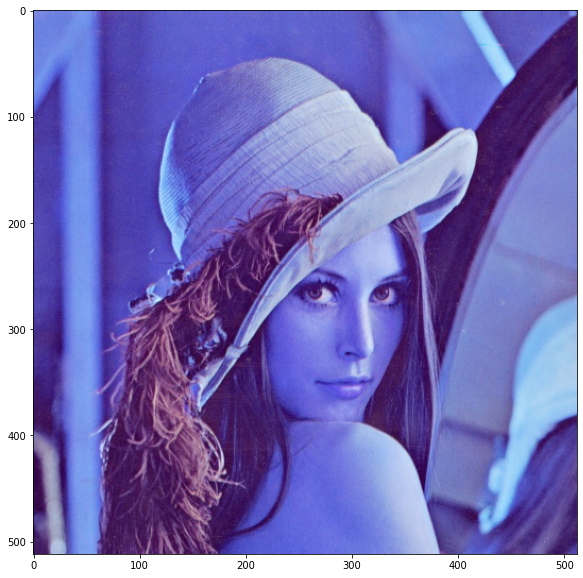

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

La salida de la imagen no se ve natural. Esto se debe a que el orden de los canales RGB es diferente. Podemos cambiar el espacio de color con el código de conversión y la función `cvtColor` de la biblioteca `cv2`:

In [25]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

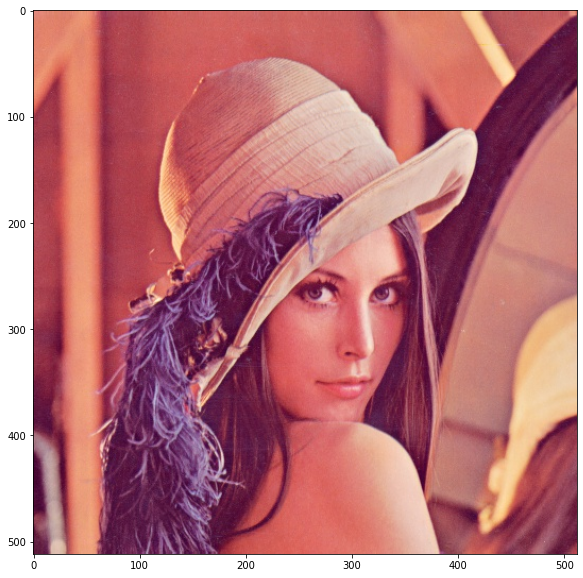

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

También puede cargar la imagen usando su ruta, esto es útil si la imagen no está en su directorio de trabajo:

In [27]:
image = cv2.imread(image_path)
image.shape

(512, 512, 3)

Se puede guardar la imagen en formato jpg


In [28]:
cv2.imwrite("lenna.png", image)

True

### Grayscale Images


Las imágenes en escala de grises tienen valores de píxeles que representan la cantidad de luz o intensidad. Los tonos claros de gris tienen una intensidad alta, los tonos más oscuros tienen una intensidad más baja. El blanco tiene la intensidad más alta y el negro la más baja. Podemos convertir una imagen a escala de grises utilizando un código de conversión de color y la función `cvtColor`.

El código para RGB a gris es `cv2.COLOR_BGR2GRAY`, aplicamos la función:

In [29]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

La matriz de imágenes tiene solo dos dimensiones, es decir, solo un canal de color:

In [30]:
image_gray.shape

(512, 512)

Podemos trazar la imagen usando `imshow` pero tenemos que especificar que el mapa de color es gris:

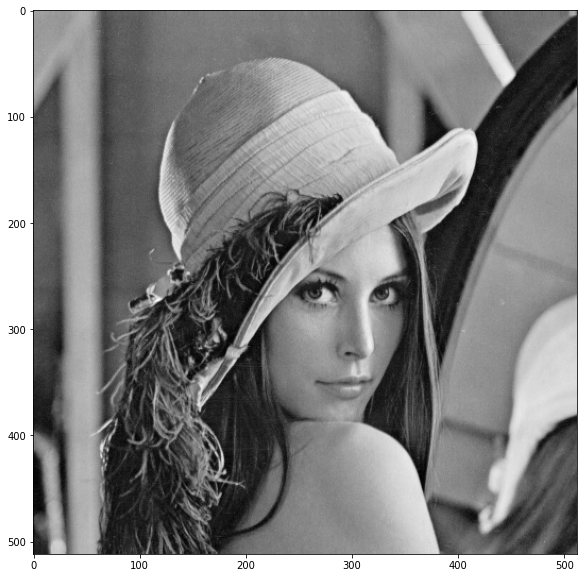

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

Podemos guardar la imagen como una imagen en escala de grises, guardémosla también como jpg, en el directorio de trabajo.

In [32]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)

True

También puede cargar una imagen en escala de grises. Tenemos que establecer el parámetro de bandera en el código de conversación de color gris: `cv2.COLOR_BGR2GRAY`:

In [33]:
im_gray = cv2.imread('/content/CV_edX/ProcessingOpenCV_Pillow/barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


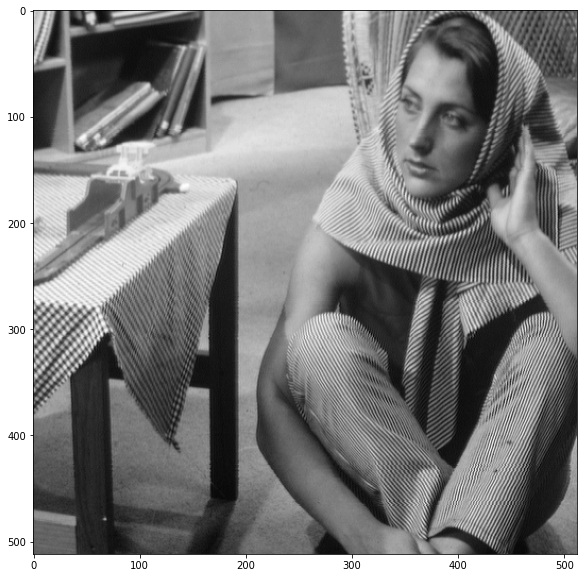

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(im_gray,cmap='gray')
plt.show()

### Canales de colores


También podemos trabajar con los diferentes canales de color. 

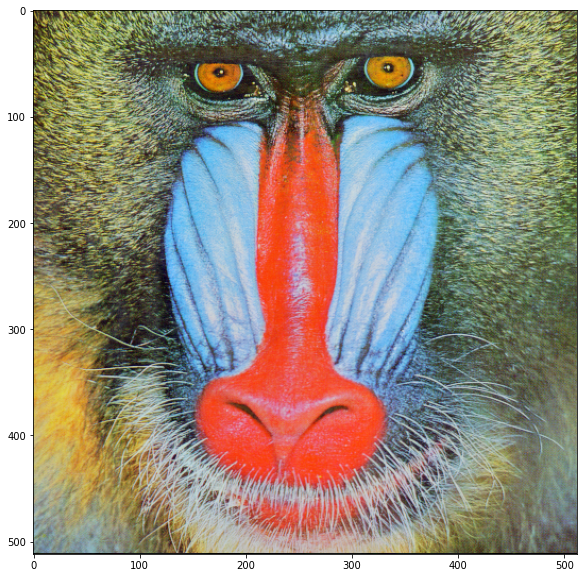

In [35]:
baboon=cv2.imread('/content/CV_edX/ProcessingOpenCV_Pillow/baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

Podemos obtener los diferentes colores RGB y asignarlos a las variables azul, verde y rojo, en formato (B, G, R).


In [36]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

Podemos concatenar cada canal de imagen las imágenes usando la función `vconcat`

In [37]:
im_bgr = cv2.vconcat([blue, green, red])

Al trazar la imagen en color junto al canal rojo en escala de grises, vemos que las regiones con rojo tienen valores de intensidad más altos.

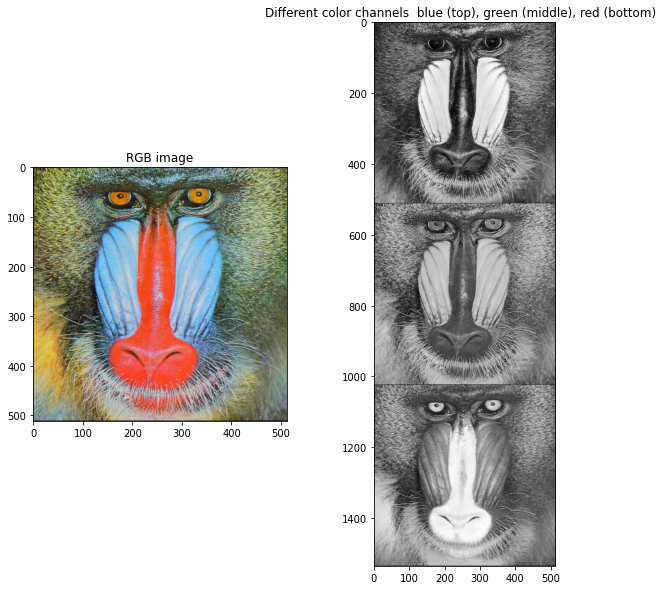

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

### Indexado


Podemos usar el corte numpy. Por ejemplo, podemos devolver las primeras 256 filas correspondientes a la mitad superior de la imagen:

In [39]:
rows = 256

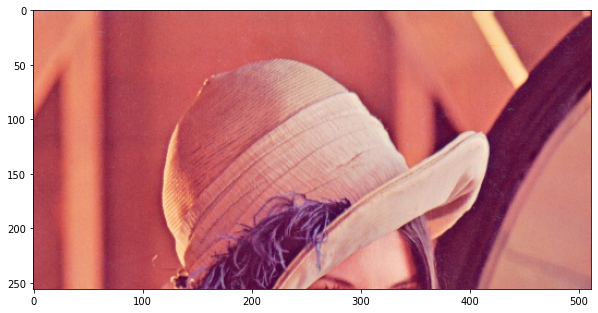

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[0:rows,:,:])
plt.show()

O podemos retornar las 256 primeras columnas

In [41]:
columns = 256

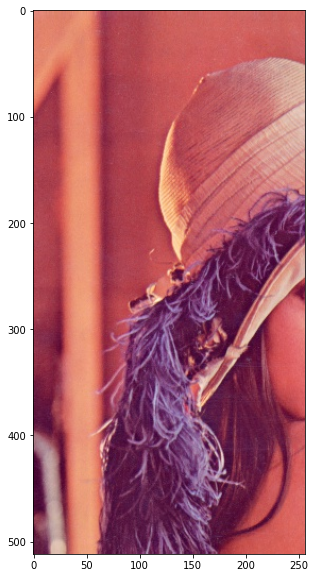

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[:,0:columns,:])
plt.show()

Si se quiere reasignar una matriz a otra variable, se debe usar el método `copy`

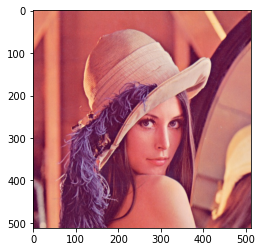

In [43]:
A = new_image.copy()
plt.imshow(A)
plt.show()

También podemos manipular elementos mediante la indexación. En el siguiente fragmento de código, creamos una nueva matriz `baboon_red` y establecemos todos los canales de color menos el rojo en cero. Por lo tanto, cuando mostramos la imagen, aparece en rojo:

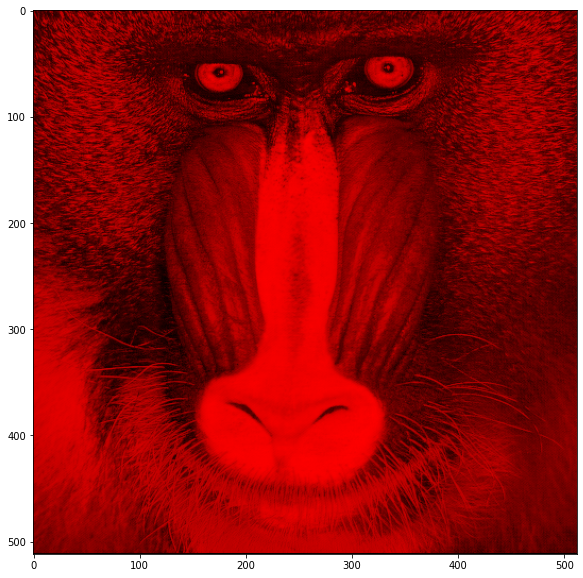

In [41]:
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for blue:


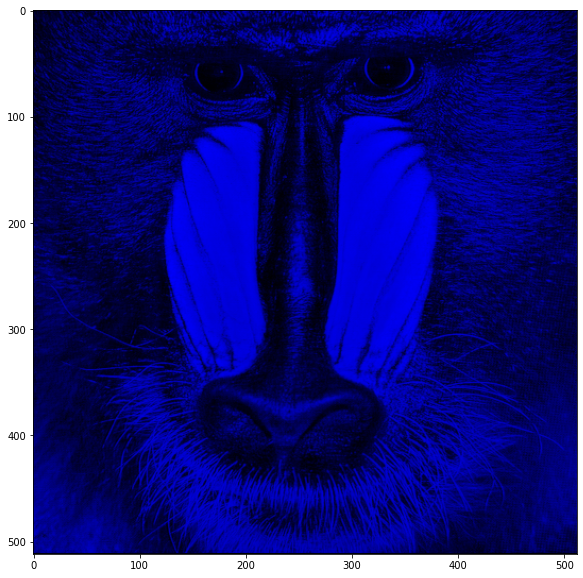

In [42]:
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for green:


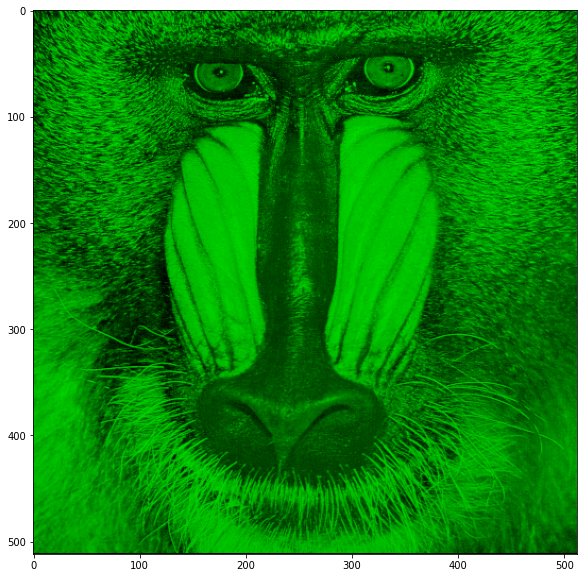

In [43]:
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image=cv2.imread('baboon.png')

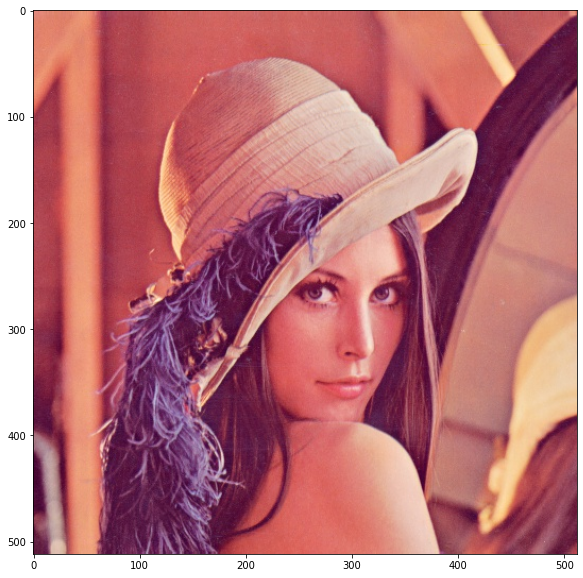

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

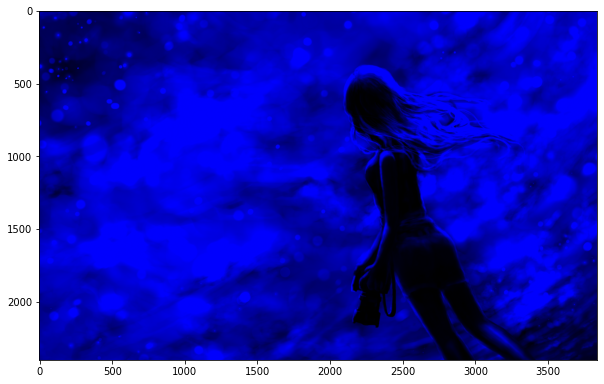

In [62]:
image=cv2.imread('/content/CV_edX/ProcessingOpenCV_Pillow/New.jpg') # replace and add you image here name 
baboon_blue=image.copy()
baboon_blue[:,:,1] = 0
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

## Ejercicio

Abrir una imagen y crear un objeto de imagen OpenCV llamado baboon_blue, convertir la imagen del formato BGR a RGB, sacar el canal azul y trazar la imagen

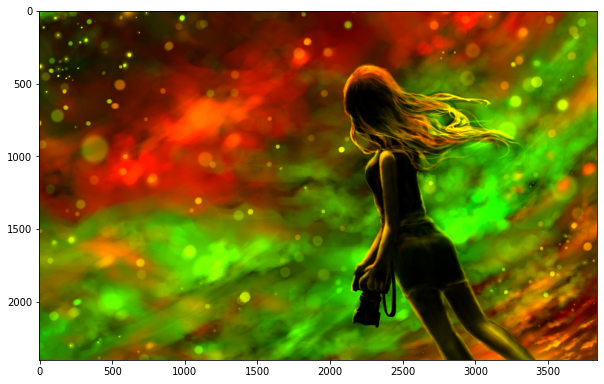

In [65]:
# write your script here
baboon_blue = cv2.imread('/content/CV_edX/ProcessingOpenCV_Pillow/New.jpg')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:, :, 2]= 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

Hecho con ❤ gracias al curso de Computer Vision and Image Processing Fundamentals en edX